# Programming Assignment # 4 Clustering

## Assignment Details

<b>The dataset is about the "Credit Card Segmentation". Your primary goal is to provide a segmentation strategy for launching a marketing campaign which helps a company to segregate customers into relevant groups. This will help the marketing team to explore more with sales strategy and increase the conversion rates. The dataset explains the behavior of customer actively using credit cards spanning 6 months. It has about 8950 users and has 18 behavioral variable columns.</b>

Use "bank.csv" attached in the same directory with this ipynb file.


**** The Dataset details are as follows:

* CUST_ID : Identification of Credit Card holder (Categorical)

* BALANCE : Balance amount left in their account to make purchases (

* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

* PURCHASES : Amount of purchases made from account

* ONEOFF_PURCHASES : Maximum purchase amount done in one-go

* INSTALLMENTS_PURCHASES : Amount of purchase done in installment

* CASH_ADVANCE : Cash in advance given by the user

* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

* PURCHASES_TRX : Numbe of purchase transactions made

* CREDIT_LIMIT : Limit of Credit Card for user

* PAYMENTS : Amount of Payment done by user

* MINIMUM_PAYMENTS : Minimum amount of payments made by user

* PRCFULLPAYMENT : Percent of full payment paid by user

* TENURE : Tenure of credit card service for user


The unsupervised problem is how to segregate the data.

You need to submit this ipynb file in a zipped folder.


In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [ ]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## TASK 0 : Preprocessing

#### Preprocessing will be needed for the data as some of the data might be empty or null and needs to be quantified.

In [ ]:
# Do your pre-processing here.
df = pd.read_csv('banks.csv')
# Checking for Null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Replacing the null values with their median values.
df.fillna(df.median(), inplace=True)
#Once again checking if there is any null value. 
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
col_drop = 'CUST_ID'
df1=df.drop([col_drop], axis=1)
df2=df.drop([col_drop], axis=1)

data_scaled1 = normalize(df2)

data_scaled1 = pd.DataFrame(data_scaled1,columns=df2.columns)

df2=data_scaled1
data_scaled = normalize(df1)
data_scaled = pd.DataFrame(data_scaled,columns=df1.columns)
df1=data_scaled
df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495
3,0.208886,0.000080,0.187872,0.187872,0.000000,0.025792,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.939987,0.000000,0.039147,0.000000,0.001504
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.025197,0.000884,0.257438,0.000000,0.257438,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884301,0.287924,0.043230,0.000442,0.005306
8946,0.016485,0.000859,0.257808,0.000000,0.257808,0.000000,0.000859,0.000000,0.000716,0.000000,0.000000,0.005156,0.859359,0.237064,0.268415,0.000000,0.005156
8947,0.022773,0.000811,0.140538,0.000000,0.140538,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973257,0.079097,0.080214,0.000243,0.005840
8948,0.026524,0.001642,0.000000,0.000000,0.000000,0.072055,0.000000,0.000000,0.000000,0.000328,0.003942,0.000000,0.985466,0.103572,0.109891,0.000493,0.011826


In [ ]:
df1.loc[ df1['CREDIT_LIMIT'] <= 0.5, 'CREDIT_LIMIT'] = 0
df1.loc[(df1['CREDIT_LIMIT'] > 0.5) & (df1['CREDIT_LIMIT'] <= 0.70), 'CREDIT_LIMIT'] = 1
df1.loc[(df1['CREDIT_LIMIT'] > 0.70) & (df1['CREDIT_LIMIT'] <= 0.90), 'CREDIT_LIMIT'] = 2
df1.loc[(df1['CREDIT_LIMIT'] > 0.90) & (df1['CREDIT_LIMIT'] < 1), 'CREDIT_LIMIT'] = 3

#df1
df1['CREDIT_LIMIT'].value_counts()


2.0    2752
3.0    2644
1.0    2423
0.0    1131
Name: CREDIT_LIMIT, dtype: int64

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k , and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 20 and plot a line chart of the SSE for each value of k, and determine the best k. 

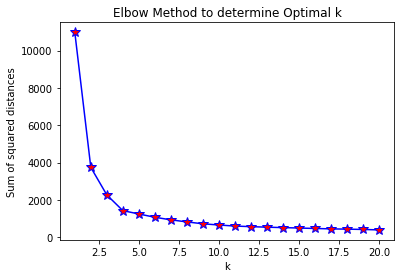

In [ ]:
#########################begin code for Task 1-a
SSE = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1)
    SSE.append(km.inertia_)
plt.plot(K, SSE, 'bx-', marker='*', color="blue", markerfacecolor="red", markersize=10)
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method to determine Optimal k')
plt.show()
#########################begin code for Task 1-a

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=8 and k=4 and visualize the predicted sample on scatter plots. Perform kmeans for clustering samples in your predicted set. 

The key here is to use metrics to understand which one of them K values gives you the best score.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.

In [ ]:
# Splitting the dataset 70% for training and 30% for testing first
features = df1.drop(columns = ['CREDIT_LIMIT'])
X_train, X_test, Y_train, Y_test = train_test_split(features, df1['CREDIT_LIMIT'], test_size = 0.3,random_state = 100)


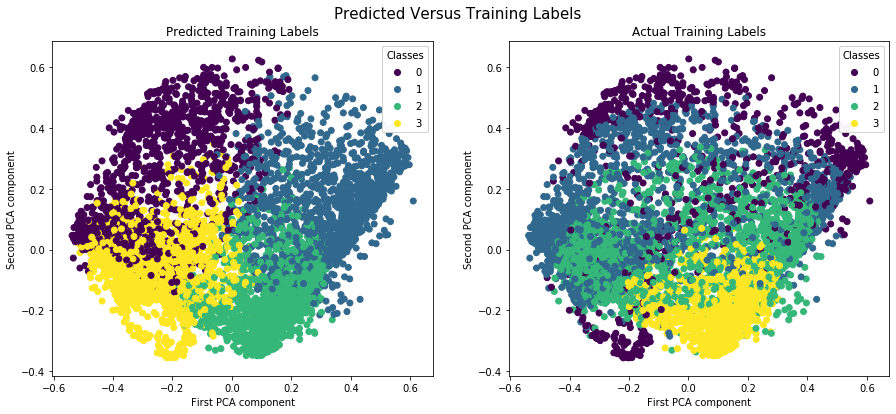

In [ ]:
# Import PCA
from sklearn.decomposition import PCA
###################begin code for Task 1-b-1: Visualize the predicted labels with clusters = 4

# Create the KMeans model
kmeans_clu = KMeans(n_clusters=4)
kmeans_clu.fit(X_train, Y_train)

# Compute cluster centers and predict cluster index for each sample 
cluster_index = kmeans_clu.fit_predict(X_train)
# Model and fit the data to the PCA model
pca_model = PCA()
X_train_pca = pca_model.fit_transform(X_train)
# Visualize the predicted labels.
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Predicted Versus Training Labels', fontsize=15)
fig.subplots_adjust(top=0.9)

### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
s=ax[0].scatter(x, y, c=cluster_index)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=Y_train)
ax[1].set_title('Actual Training Labels')

for i in ax.flat:
    i.set(xlabel='First PCA component', ylabel='Second PCA component')
    scat_legend = i.legend(*s.legend_elements(), title="Classes", loc="upper right")
    i.add_artist(scat_legend)

plt.show()

###################end code for Task 1-b-1

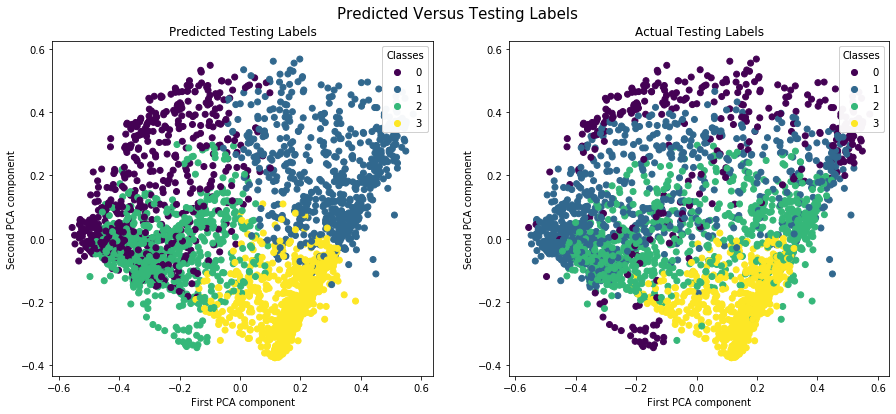

In [ ]:
# predict cluster index for each sample 
clusters_index_test = kmeans_clu.fit_predict(X_test)

# Model and fit the data to the PCA model
pca = PCA()
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted training labels vs actual training labels.
# Creating layout for subplots 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Predicted Versus Testing Labels', fontsize=15)
fig.subplots_adjust(top=0.9)

### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
s = ax[0].scatter(x, y, c=clusters_index_test)
ax[0].set_title('Predicted Testing Labels')
ax[1].scatter(x, y, c=Y_test)
ax[1].set_title('Actual Testing Labels')

for i in ax.flat:
    i.set(xlabel='First PCA component', ylabel='Second PCA component')
    scat_legend = i.legend(*s.legend_elements(), title="Classes", loc="upper right")
    i.add_artist(scat_legend)
plt.show()



In [ ]:
###################begin code for Task 1-b-3: Print out a confusion matrix of the input dataset with clusters = 4

Y_predict = kmeans_clu.predict(X_test)
print("Confusion Matrix is:\n", confusion_matrix(Y_test,Y_predict))

###################end code for Task 1-b-3

Confusion Matrix is:
 [[105 162  74   0]
 [248 186 295   0]
 [183 246 295  80]
 [  3   1  20 787]]


In [ ]:
df2.loc[ df2['CREDIT_LIMIT'] <= 0.2, 'CREDIT_LIMIT'] = 0
df2.loc[(df2['CREDIT_LIMIT'] > 0.2) & (df2['CREDIT_LIMIT'] <= 0.3), 'CREDIT_LIMIT'] = 1
df2.loc[(df2['CREDIT_LIMIT'] > 0.3) & (df2['CREDIT_LIMIT'] <= 0.4), 'CREDIT_LIMIT'] = 2
df2.loc[(df2['CREDIT_LIMIT'] > 0.4) & (df2['CREDIT_LIMIT'] <= 0.5), 'CREDIT_LIMIT'] = 3
df2.loc[(df2['CREDIT_LIMIT'] > 0.5) & (df2['CREDIT_LIMIT'] <= 0.6), 'CREDIT_LIMIT'] = 4
df2.loc[(df2['CREDIT_LIMIT'] > 0.6) & (df2['CREDIT_LIMIT'] <= 0.7), 'CREDIT_LIMIT'] = 5
df2.loc[(df2['CREDIT_LIMIT'] > 0.7) & (df2['CREDIT_LIMIT'] <= 0.9), 'CREDIT_LIMIT'] = 6
df2.loc[(df2['CREDIT_LIMIT'] > 0.90) & (df2['CREDIT_LIMIT'] < 1), 'CREDIT_LIMIT'] = 7

df2['CREDIT_LIMIT'].value_counts()

6.0    2752
7.0    2644
5.0    1614
4.0     809
3.0     544
2.0     305
1.0     165
0.0     117
Name: CREDIT_LIMIT, dtype: int64

In [ ]:
features = df2.drop(columns = ['CREDIT_LIMIT'])
X_train, X_test, Y_train, Y_test = train_test_split(features, df2['CREDIT_LIMIT'], test_size = 0.3,random_state = 100)

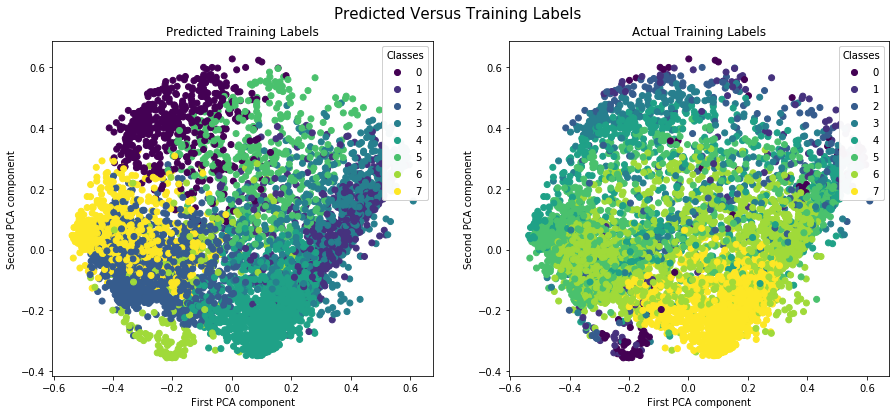

In [ ]:
###################begin code for Task 1-b-2: Visualize the predicted  labels with clusters = 8

# Create the KMeans model
kmeans_clu = KMeans(n_clusters=8)
kmeans_clu.fit(X_train, Y_train)

# Compute cluster centers and predict cluster index for each sample 
cluster_index = kmeans_clu.fit_predict(X_train)
# Model and fit the data to the PCA model
pca_model = PCA()
X_train_pca = pca_model.fit_transform(X_train)
# Visualize the predicted labels.
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Predicted Versus Training Labels', fontsize=15)
fig.subplots_adjust(top=0.9)

### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
s=ax[0].scatter(x, y, c=cluster_index)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=Y_train)
ax[1].set_title('Actual Training Labels')

for i in ax.flat:
    i.set(xlabel='First PCA component', ylabel='Second PCA component')
    scat_legend = i.legend(*s.legend_elements(), title="Classes", loc="upper right")
    i.add_artist(scat_legend)

plt.show()
###################end code for Task 1-b-2

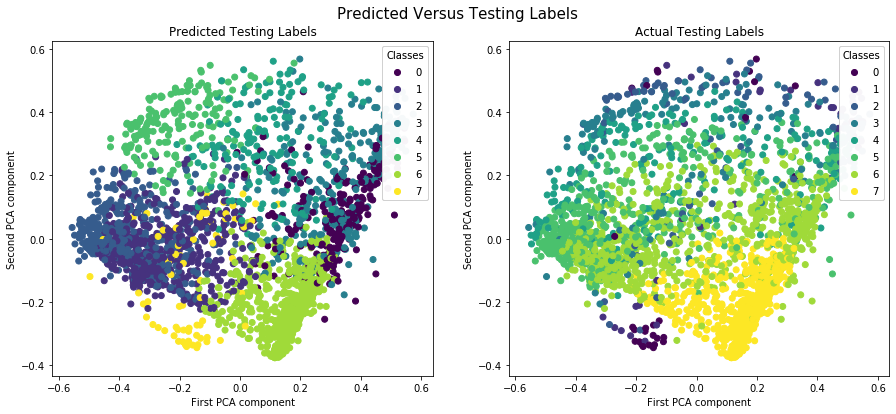

In [ ]:
# predict cluster index for each sample 
clusters_index_test = kmeans_clu.fit_predict(X_test)

# Model and fit the data to the PCA model
pca = PCA()
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted training labels vs actual training labels.
# Creating layout for subplots 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Predicted Versus Testing Labels', fontsize=15)
fig.subplots_adjust(top=0.9)

### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
s = ax[0].scatter(x, y, c=clusters_index_test)
ax[0].set_title('Predicted Testing Labels')
ax[1].scatter(x, y, c=Y_test)
ax[1].set_title('Actual Testing Labels')

for i in ax.flat:
    i.set(xlabel='First PCA component', ylabel='Second PCA component')
    scat_legend = i.legend(*s.legend_elements(), title="Classes", loc="upper right")
    i.add_artist(scat_legend)
plt.show()



In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [ ]:
###################begin code for Task 1-b-4: Print out a confusion matrix of the input dataset with clusters =8
Y_predict = kmeans_clu.predict(X_test)
print("Confusion Matrix is:\n", confusion_matrix(Y_test,Y_predict))

###################end code for Task 1-b-4

Confusion Matrix is:
 [[  1   0   0   7   3   4   0  18]
 [  3   0   0  15   6   6   0  12]
 [ 12   0   0  26  19  25   0  17]
 [ 15   5   4  36  24  62   0  21]
 [ 18  38  44  41  31  43   0   3]
 [ 34 219 140  55  33  29   0   1]
 [152 259 168 114  70  21  17   3]
 [ 24  18   9   0   0   0 760   0]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 8 and n_clusters = 4.


In [ ]:
###################begin code for Task 2-a: Print out a confusion matrix for n_cluster=4
# Splitting the dataset 70% for training and 30% for testing first
features = df1.drop(columns = ['CREDIT_LIMIT'])
X_train, X_test, Y_train, Y_test = train_test_split(features, df1['CREDIT_LIMIT'], test_size = 0.3,random_state = 100)


# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix.
pdm_train = pairwise_distances(X_train)
print(pdm_train)

## Model and fit the data to the AgglomerativeClustering model
## complete linkage + cosine
comp_cos = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='cosine')
model1 = comp_cos.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
comp_euc = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean')
model2 = comp_euc.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
comp_man = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='manhattan')
model3 = comp_man.fit_predict(X_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
avg_cos = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='cosine')
model4 = avg_cos.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
avg_euc = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='euclidean')
model5 = avg_euc.fit_predict(X_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
avg_man = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='manhattan')
model6 = avg_man.fit_predict(X_train)






print("F1-score for complete linkage + cosine", f1_score(Y_train, model1,average='micro'))
print("F1-score for complete linkage + euclidean", f1_score(Y_train, model2,average='micro'))
print("F1-score for complete linkage + manhattan", f1_score(Y_train, model3,average='micro'))
print("F1-score for average linkage + cosine", f1_score(Y_train, model4,average='micro'))
print("F1-score for average linkage + euclidean", f1_score(Y_train, model5,average='micro'))
print("F1-score for average linkage + manhattan", f1_score(Y_train, model6,average='micro'))



[[0.         0.18727444 0.84285205 ... 0.32295585 0.25265092 0.3053987 ]
 [0.18727444 0.         0.86960472 ... 0.47702912 0.40968305 0.33354385]
 [0.84285205 0.86960472 0.         ... 0.77011794 0.83234661 0.77173682]
 ...
 [0.32295585 0.47702912 0.77011794 ... 0.         0.12050624 0.50718906]
 [0.25265092 0.40968305 0.83234661 ... 0.12050624 0.         0.45605977]
 [0.3053987  0.33354385 0.77173682 ... 0.50718906 0.45605977 0.        ]]
F1-score for complete linkage + cosine 0.2303272146847566
F1-score for complete linkage + euclidean 0.14828411811652034
F1-score for complete linkage + manhattan 0.31763766959297685
F1-score for average linkage + cosine 0.23990422984836393
F1-score for average linkage + euclidean 0.19808459696727854
F1-score for average linkage + manhattan 0.11173184357541899


In [ ]:
## Task 2-b1:  Visualization for Hierarchical Agglomerative Clustering for n_clusters=4

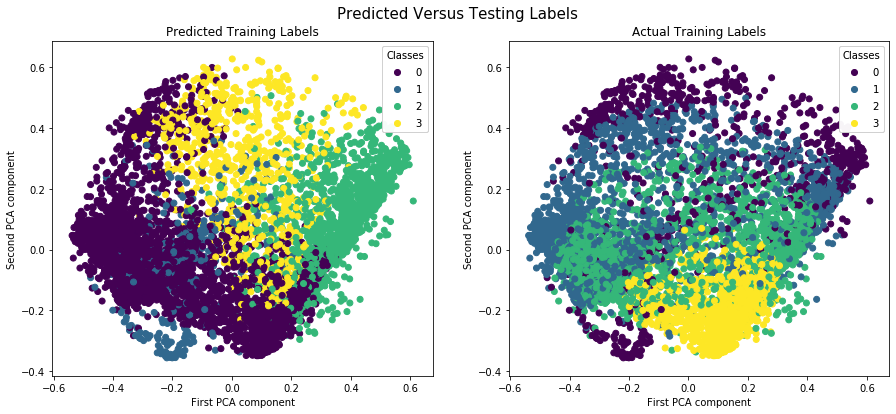

In [ ]:
###################begin code for Task 2-b1: Visualize the predicted labels for n_cluseters=4
# Model and fit the data to the PCA model
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels versus actual training labels. 
# Creating layout for subplots 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Predicted Versus Testing Labels', fontsize=15)
fig.subplots_adjust(top=0.9)

### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
s = ax[0].scatter(x, y, c=model2)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=Y_train)
ax[1].set_title('Actual Training Labels')

for i in ax.flat:
    i.set(xlabel='First PCA component', ylabel='Second PCA component')
    scat_legend = i.legend(*s.legend_elements(), title="Classes", loc="upper right")
    i.add_artist(scat_legend)

plt.show()




###################end code for Task 2-b1

In [ ]:
###################begin code for Task 2-a2: Print out a confusion matrix for n_cluster=8
features = df2.drop(columns = ['CREDIT_LIMIT'])
X_train, X_test, Y_train, Y_test = train_test_split(features, df2['CREDIT_LIMIT'], test_size = 0.3,random_state = 100)


# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix.
pdm_train = pairwise_distances(X_train)
print(pdm_train)

## Model and fit the data to the AgglomerativeClustering model
## complete linkage + cosine
comp_cos = AgglomerativeClustering(n_clusters=8, linkage='complete', affinity='cosine')
model1 = comp_cos.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
comp_euc = AgglomerativeClustering(n_clusters=8, linkage='complete', affinity='euclidean')
model2 = comp_euc.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
comp_man = AgglomerativeClustering(n_clusters=8, linkage='complete', affinity='manhattan')
model3 = comp_man.fit_predict(X_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
avg_cos = AgglomerativeClustering(n_clusters=8, linkage='average', affinity='cosine')
model4 = avg_cos.fit_predict(X_train)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
avg_euc = AgglomerativeClustering(n_clusters=8, linkage='average', affinity='euclidean')
model5 = avg_euc.fit_predict(X_train)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
avg_man = AgglomerativeClustering(n_clusters=8, linkage='average', affinity='manhattan')
model6 = avg_man.fit_predict(X_train)






print("F1-score for complete linkage + cosine", f1_score(Y_train, model1,average='micro'))
print("F1-score for complete linkage + euclidean", f1_score(Y_train, model2,average='micro'))
print("F1-score for complete linkage + manhattan", f1_score(Y_train, model3,average='micro'))
print("F1-score for average linkage + cosine", f1_score(Y_train, model4,average='micro'))
print("F1-score for average linkage + euclidean", f1_score(Y_train, model5,average='micro'))
print("F1-score for average linkage + manhattan", f1_score(Y_train, model6,average='micro'))

###################end code for Task 2-a2

[[0.         0.18727444 0.84285205 ... 0.32295585 0.25265092 0.3053987 ]
 [0.18727444 0.         0.86960472 ... 0.47702912 0.40968305 0.33354385]
 [0.84285205 0.86960472 0.         ... 0.77011794 0.83234661 0.77173682]
 ...
 [0.32295585 0.47702912 0.77011794 ... 0.         0.12050624 0.50718906]
 [0.25265092 0.40968305 0.83234661 ... 0.12050624 0.         0.45605977]
 [0.3053987  0.33354385 0.77173682 ... 0.50718906 0.45605977 0.        ]]
F1-score for complete linkage + cosine 0.1592976855546688
F1-score for complete linkage + euclidean 0.05091779728651237
F1-score for complete linkage + manhattan 0.15434956105347167
F1-score for average linkage + cosine 0.12162809257781325
F1-score for average linkage + euclidean 0.1854748603351955
F1-score for average linkage + manhattan 0.03814844373503591


## Task 2-b2:  Visualization for Hierarchical Agglomerative Clustering n_clusters=8

Find the best performed model from the previous step and use that model for visualizing the predicted  samples on scatter plots.

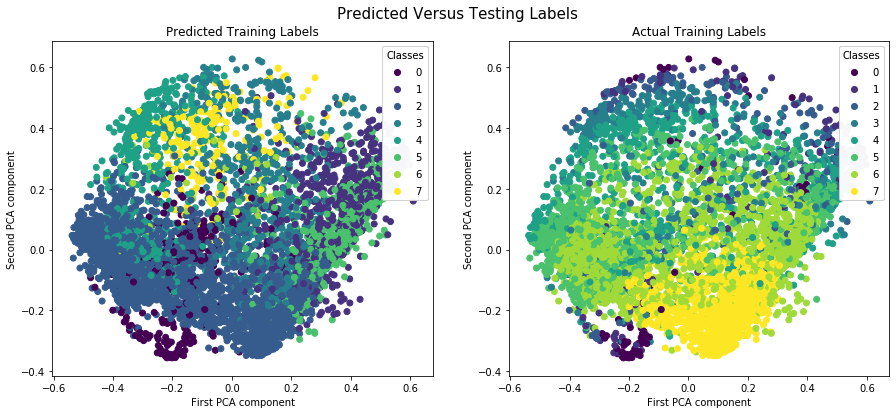

In [ ]:
###################begin code for Task 2-b2: Visualize the predicted labels for n_cluseters=8
# Model and fit the data to the PCA model
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels versus actual training labels. 
# Creating layout for subplots 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Predicted Versus Testing Labels', fontsize=15)
fig.subplots_adjust(top=0.9)

### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
s = ax[0].scatter(x, y, c=model2)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=Y_train)
ax[1].set_title('Actual Training Labels')

for i in ax.flat:
    i.set(xlabel='First PCA component', ylabel='Second PCA component')
    scat_legend = i.legend(*s.legend_elements(), title="Classes", loc="upper right")
    i.add_artist(scat_legend)

plt.show()




###################end code for Task 2-b2

# TASK 3:  WEKA Visualization of K-means Clustering and Hierarchical Agglomerative Clustering

#### Provide the WEKA files inside a titled folder, and attach all the required files for what you think might be relevant for explaining. Each of the image you attach, attach a two line description below here, For example (image1.png - "Writer your description here.")

## Task 3-a : Visualize the k-means clustering using weka

In [ ]:
###################start Task 3-a
#The first image shows tha two clusters are being made when the data file runs in the weka tool.There are 8950 data points in total, cluster 0 has 4911 data points where as cluster 1 has 4039 data points.
#The second image shows the visualization of two clusters made inaccordance with the customer ids given in the data.
#The third image shows the visualization of two clusters made in accordance with the payments given in the data.
#The fourth image shows the visualization of two clusters made with respect to the purchases made as given in data.

###################end Task 3-a

In [ ]:
Simple k-means clustering

![kmeans1.png](attachment:kmeans1.png)

![cust_idkmeans.png](attachment:cust_idkmeans.png)

![paymentskmeans.png](attachment:paymentskmeans.png)

![purchaseskmeans.png](attachment:purchaseskmeans.png)

## Task 3-b : Visualize the hierarchical clustering using weka

In [ ]:
###################start Task 3-b

#The first image shows tha two clusters are being made when the data file runs in the weka tool.There are 8950 data points in total, cluster 0 has 4506 data points where as cluster 1 has 4444 data points.
#The second image shows the visualization of two clusters made inaccordance with the customer ids given in the data.
#The third image shows the visualization of two clusters made in accordance with the payments given in the data.
#The fourth image shows the visualization of two clusters made with respect to the purchases made as given in data.



###################end Task 3-b

In [ ]:
hierarchical clustering

![hierarchial1.png](attachment:hierarchial1.png)

![cust_idhier.png](attachment:cust_idhier.png)

![paymentshier.png](attachment:paymentshier.png)

![purchaseshier.png](attachment:purchaseshier.png)


# TASK 4:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 4-a: Visualize Clusters 

In this task, Visualize the predicted labels from k-means clustering and agglomerative clustering(best one from task 2-a). Basically, you need to plot two scatter plots as subplots. 

In [ ]:
## Model and fit the training data to the AgglomerativeClustering model

X = df1.drop(columns = ['CREDIT_LIMIT'])
Y = df1['CREDIT_LIMIT']

## complete linkage + cosine
comp_cos = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='cosine')
model11 = comp_cos.fit_predict(X)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
comp_euc = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean')
model21 = comp_euc.fit_predict(X)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
comp_man = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='manhattan')
model31 = comp_man.fit_predict(X)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
avg_cos = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='cosine')
model41 = avg_cos.fit_predict(X)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
avg_euc = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='euclidean')
model51 = avg_euc.fit_predict(X)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
avg_man = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='manhattan')
model61 = avg_man.fit_predict(X)


print("F1-score for complete linkage + cosine", f1_score(Y, model11,average='micro'))
print("F1-score for complete linkage + euclidean", f1_score(Y, model21,average='micro'))
print("F1-score for complete linkage + manhattan", f1_score(Y, model31,average='micro'))
print("F1-score for average linkage + cosine", f1_score(Y, model41,average='micro'))
print("F1-score for average linkage + euclidean", f1_score(Y, model51,average='micro'))
print("F1-score for average linkage + manhattan", f1_score(Y, model61,average='micro'))



F1-score for complete linkage + cosine 0.25184357541899444
F1-score for complete linkage + euclidean 0.133072625698324
F1-score for complete linkage + manhattan 0.17307262569832402
F1-score for average linkage + cosine 0.12726256983240222
F1-score for average linkage + euclidean 0.08826815642458101
F1-score for average linkage + manhattan 0.21754189944134078


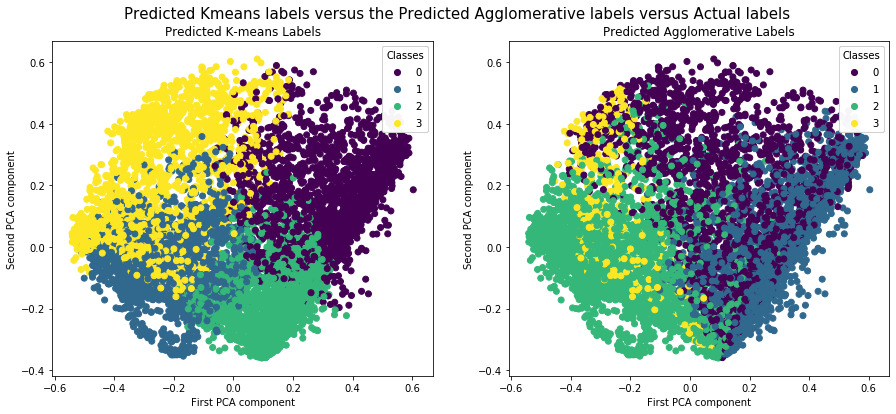

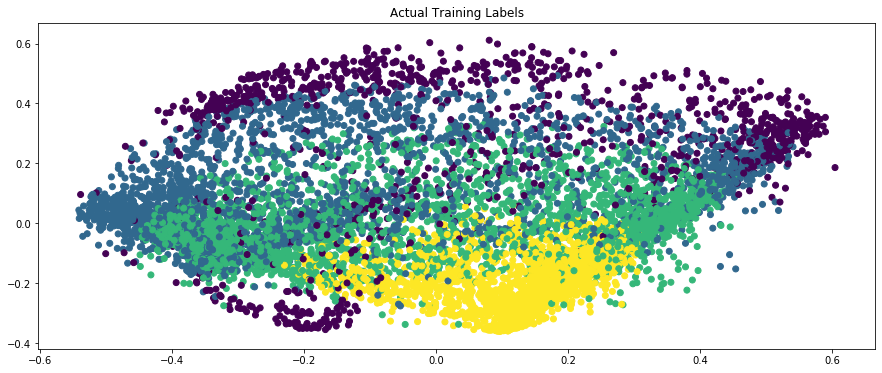

In [ ]:
###################begin code for Task 4-a: Visualize the predicted labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
X = df1.drop(columns = ['CREDIT_LIMIT'])
kmeans_clu = KMeans(n_clusters=4)
kmeans_clu_predict = kmeans_clu.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(X)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
Agg_clu = AgglomerativeClustering(n_clusters=4)
Agg_clu_predict = Agg_clu.fit_predict(X)

### Visualize Clusters
#  Model and fit the data to the PCA model
pca = PCA()
X_pca = pca.fit_transform(X)

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
fig1, ax = plt.subplots(1, 2,figsize=(15, 6))
fig2, ax1 = plt.subplots(figsize=(15, 6))
fig1.suptitle('Predicted Kmeans labels versus the Predicted Agglomerative labels versus Actual labels', fontsize=15)
fig1.subplots_adjust(top=0.9)

### scatter(x, y, your_data)
x = X_pca[:, 0]
y = X_pca[:, 1]
s = ax[0].scatter(x, y, c=kmeans_clu_predict)
ax[0].set_title('Predicted K-means Labels')
ax[1].scatter(x, y, c=model11)
ax[1].set_title('Predicted Agglomerative Labels')
s=ax1.scatter(x, y, c=df1['CREDIT_LIMIT'])
ax1.set_title('Actual Training Labels')

for i in ax.flat:
    i.set(xlabel='First PCA component', ylabel='Second PCA component')
    scat_legend = i.legend(*s.legend_elements(), title="Classes", loc="upper right")
    i.add_artist(scat_legend)

plt.show()



###################end code for Task 4-a

## Task 4-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. 

Type your reasoning for which one of the clustering models is best fit for our dataset.

In [ ]:
###################begin code for Task 4-b
X = df1.drop(columns = ['CREDIT_LIMIT'])
Y = df1['CREDIT_LIMIT']
## Confusion Matrix for Kmeans.

kmeans_clu = KMeans(n_clusters=4)
kmeans_clu_predict = kmeans_clu.fit_predict(X)
print("Confusion Matrix for K means: \n",confusion_matrix(Y,kmeans_clu_predict),'\n')

## Confusion Matrix for Hierarchial Agglomerative Clustering.
Agg_clu = AgglomerativeClustering(n_clusters=4)
Agg_clu_predict = Agg_clu.fit_predict(X)
print("Confusion Matrix for Agglomerative Clustering: \n",confusion_matrix(Y,Agg_clu_predict),'\n')
## Compare precision, recall, and F1-score for both model.
print("Classification Report for K means: \n",classification_report(Y,kmeans_clu_predict))
print("Classification Report for Agglomerative Clustering: \n",classification_report(Y,Agg_clu_predict))

## Which model is the best fit for our dataset. Explain in detail!


###################end code for Task 4-b

Confusion Matrix for K means: 
 [[ 372  262    0  497]
 [ 831  950    0  642]
 [ 580 1034  307  831]
 [  23   66 2555    0]] 

Confusion Matrix for Agglomerative Clustering: 
 [[ 413  391  327    0]
 [ 847  605  967    4]
 [ 684 1022 1007   39]
 [  29  642  257 1716]] 

Classification Report for K means: 
               precision    recall  f1-score   support

         0.0       0.21      0.33      0.25      1131
         1.0       0.41      0.39      0.40      2423
         2.0       0.11      0.11      0.11      2752
         3.0       0.00      0.00      0.00      2644

    accuracy                           0.18      8950
   macro avg       0.18      0.21      0.19      8950
weighted avg       0.17      0.18      0.17      8950

Classification Report for Agglomerative Clustering: 
               precision    recall  f1-score   support

         0.0       0.21      0.37      0.27      1131
         1.0       0.23      0.25      0.24      2423
         2.0       0.39      0.37      0

## Grading 

<b>Follow the Rules</b> 

<b>[5 points] Task0:</b>  

    [05 points] Task 0: 5 points


<b>[30 points] Task 1:</b>  

    [05 points] Task 1-a: 15 points

    [20 points] Task 1-b: 15 points


<b>[30 points] Task 2:</b>  

    [20 points] Task 2-a: 15 points
    
    [10 points] Task 2-b: 15 points

<b>[10 points] Task 3:</b> 

    Task 3-a: 5 points

    Task 3-b: 5 points

<b>[25 points] Task 4:</b> 

    Task 4-a: 10 points

    Task 4-b: 15 points